In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(url)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

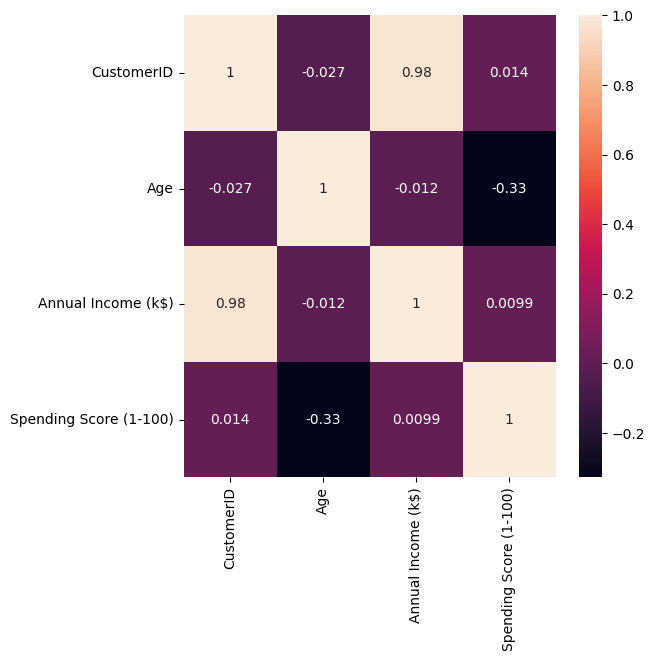

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True)

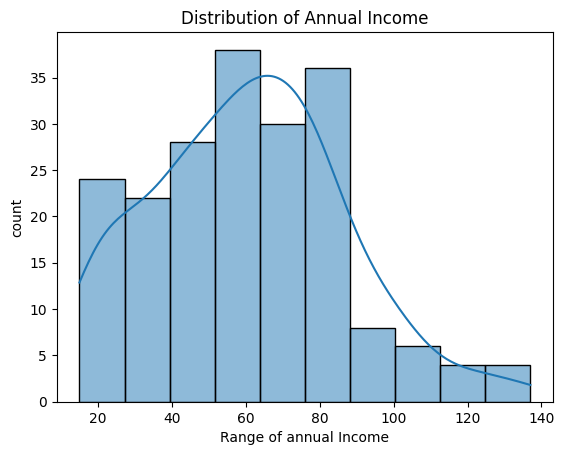

In [ ]:
sns.histplot(df['Annual Income (k$)'],kde=True,bins=10)
plt.title("Distribution of Annual Income")
plt.xlabel('Range of annual Income')
plt.ylabel('count')
plt.show()

In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


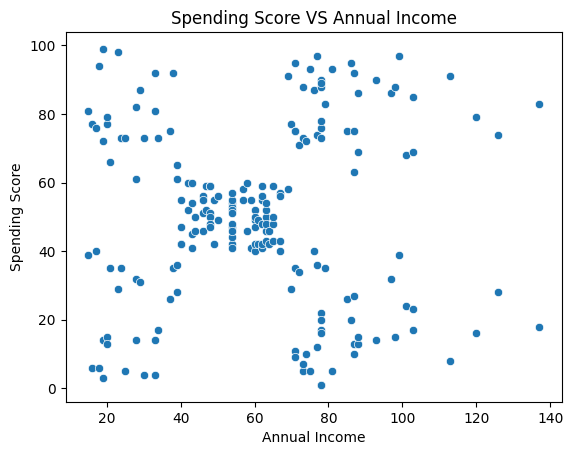

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spending Score VS Annual Income')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans_obj = KMeans(n_clusters=i , init = "k-means++" ,max_iter= 300 ,
                      random_state = 0,n_init =10)
  kmeans_obj.fit(X_scaled)
  wcss.append(kmeans_obj.inertia_)

In [ ]:
wcss

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

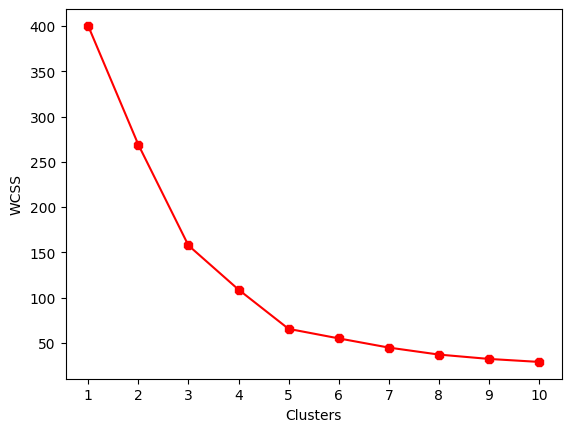

In [ ]:
plt.plot(range(1,11),wcss,marker="8",color="red")
plt.ylabel("WCSS")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
kmeans_obj1 = KMeans(n_clusters=5 , init = "k-means++" ,max_iter= 300 ,
                      random_state = 0, n_init =10)
kmeans_obj1 = kmeans_obj1.fit(X)
cluster_labels = kmeans_obj1.predict(X)
df1 = df
df1['Cluster'] = cluster_labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


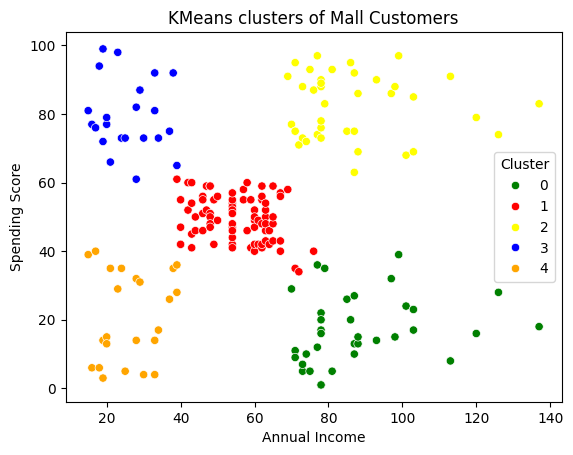

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1 ,
                hue="Cluster",
                palette=['green','red','yellow','blue','orange'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans clusters of Mall Customers')
plt.show()

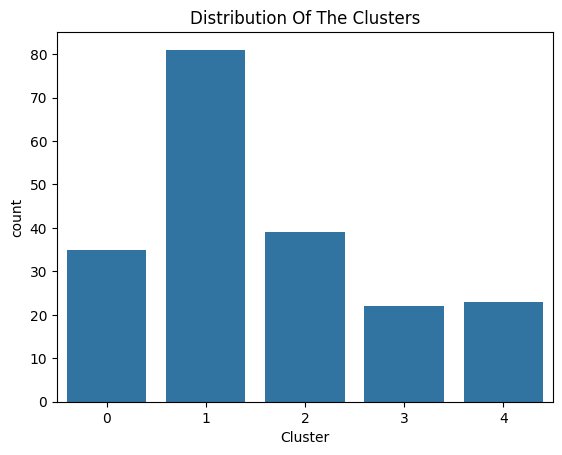

In [ ]:
pl = sns.countplot(x=df1["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
#Agglomerative Hierarchical Clustering


In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram


In [62]:
X = np.array(X)

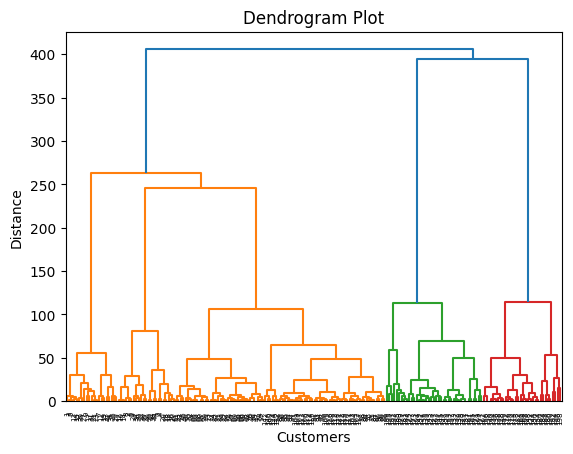

In [63]:
connects = linkage(X,method="ward")
dendrogram(connects)
plt.title("Dendrogram Plot")
plt.xlabel("Customers")
plt.ylabel("Distance")

plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters = 5 , metric='euclidean',linkage='ward')
y_pred =agg_hc.fit_predict(X)

In [65]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

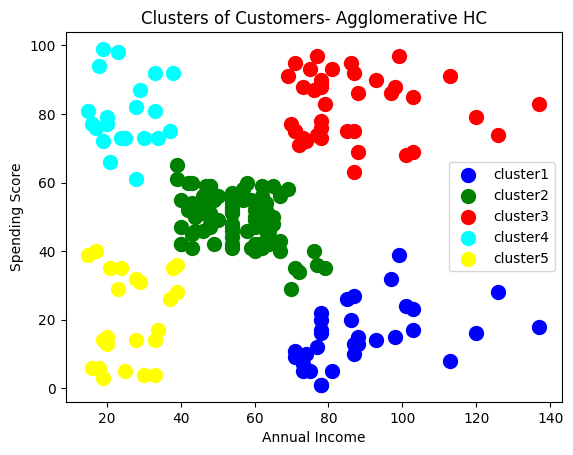

In [66]:
plt.scatter(X[y_pred == 0,0],X[y_pred==0,1],s=100,c='blue',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='green',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='red',label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='yellow',label='cluster5')
plt.title('Clusters of Customers- Agglomerative HC')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [68]:
df1['Cluster_agglo'] = y_pred
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_agglo
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4


In [70]:
df1['Cluster'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: Cluster, dtype: int64

In [71]:
df1['Cluster_agglo'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: Cluster_agglo, dtype: int64